In [1]:
from netCDF4 import *
import matplotlib.pyplot as plt
import matplotlib.colors as co
import matplotlib.ticker as ticker
from path import Path
import xarray as xr
import numpy as np
import math
import scipy.interpolate as interp
import scipy.stats as stats
import tkinter as tk
import pandas as pd

from matplotlib import rc
font = {"family": "serif", "weight": "normal", "size": 13}
rc("font", **font)
rc("text", usetex=True)

### Data imported from GLORYS12V1

In [2]:
#Different datasets to be compared


dsr_list = []
path = Path(r"C:\\Users\\albou\Desktop\\The_Ocean_Cleanup\\Work\data\\GLORYS\\GPGP_flow_2014.nc")
# path = Path(r"C:\\Users\\albou\Desktop\\The_Ocean_Cleanup\\Work\data\\GLOBCURRENT\\GLOBCURRENT_2014.nc")
dsr_list.append(xr.open_dataset(path, engine="netcdf4"))
path = Path(r"C:\\Users\\albou\Desktop\\The_Ocean_Cleanup\\Work\data\\GLORYS\\GPGP_flow_2015.nc")
# path = Path(r"C:\\Users\\albou\Desktop\\The_Ocean_Cleanup\\Work\data\\GLOBCURRENT\\GLOBCURRENT_2015.nc")
dsr_list.append(xr.open_dataset(path, engine="netcdf4"))
path = Path(r"C:\\Users\\albou\Desktop\\The_Ocean_Cleanup\\Work\data\\GLORYS\\GPGP_flow_2016.nc")
# path = Path(r"C:\\Users\\albou\Desktop\\The_Ocean_Cleanup\\Work\data\\GLOBCURRENT\\GLOBCURRENT_2016.nc")
dsr_list.append(xr.open_dataset(path, engine="netcdf4"))
path = Path(r"C:\\Users\\albou\Desktop\\The_Ocean_Cleanup\\Work\data\\GLORYS\\GPGP_flow_2017.nc")
# path = Path(r"C:\\Users\\albou\Desktop\\The_Ocean_Cleanup\\Work\data\\GLOBCURRENT\\GLOBCURRENT_2017.nc")
dsr_list.append(xr.open_dataset(path, engine="netcdf4"))
path = Path(r"C:\\Users\\albou\Desktop\\The_Ocean_Cleanup\\Work\data\\GLORYS\\GPGP_flow_2018.nc")
# path = Path(r"C:\\Users\\albou\Desktop\\The_Ocean_Cleanup\\Work\data\\GLOBCURRENT\\GLOBCURRENT_2018.nc")
dsr_list.append(xr.open_dataset(path, engine="netcdf4"))
path = Path(r"C:\\Users\\albou\Desktop\\The_Ocean_Cleanup\\Work\data\\GLORYS\\GPGP_flow_2019.nc")
# path = Path(r"C:\\Users\\albou\Desktop\\The_Ocean_Cleanup\\Work\data\\GLOBCURRENT\\GLOBCURRENT_2019.nc")
dsr_list.append(xr.open_dataset(path, engine="netcdf4"))
path = Path(r"C:\\Users\\albou\Desktop\\The_Ocean_Cleanup\\Work\data\\GLORYS\\GPGP_flow_2020.nc")
# path = Path(r"C:\\Users\\albou\Desktop\\The_Ocean_Cleanup\\Work\data\\GLOBCURRENT\\GLOBCURRENT_2020.nc")
dsr_list.append(xr.open_dataset(path, engine="netcdf4"))
path = Path(r"C:\\Users\\albou\Desktop\\The_Ocean_Cleanup\\Work\data\\GLORYS\\GPGP_flow_2021.nc")
# path = Path(r"C:\\Users\\albou\Desktop\\The_Ocean_Cleanup\\Work\data\\GLOBCURRENT\\GLOBCURRENT_2021.nc")
dsr_list.append(xr.open_dataset(path, engine="netcdf4"))
path = Path(r"C:\\Users\\albou\Desktop\\The_Ocean_Cleanup\\Work\data\\GLORYS\\GPGP_flow_2022.nc")
# path = Path(r"C:\\Users\\albou\Desktop\\The_Ocean_Cleanup\\Work\data\\GLOBCURRENT\\GLOBCURRENT_2022.nc")
dsr_list.append(xr.open_dataset(path, engine="netcdf4"))
path = Path(r"C:\\Users\\albou\Desktop\\The_Ocean_Cleanup\\Work\data\\GLORYS\\GPGP_flow_2023.nc")
# path = Path(r"C:\\Users\\albou\Desktop\\The_Ocean_Cleanup\\Work\data\\GLOBCURRENT\\GLOBCURRENT_2023.nc")
dsr_list.append(xr.open_dataset(path, engine="netcdf4"))
path = Path(r"C:\\Users\\albou\Desktop\\The_Ocean_Cleanup\\Work\data\\GLORYS\\GPGP_flow_2024.nc")
# path = Path(r"C:\\Users\\albou\Desktop\\The_Ocean_Cleanup\\Work\data\\GLOBCURRENT\\GLOBCURRENT_2024.nc")
dsr_list.append(xr.open_dataset(path, engine="netcdf4"))

path = Path(r"C:\\Users\\albou\Desktop\\The_Ocean_Cleanup\\Work\data\\GLORYS\\GPGP_flow_2025.nc")
# dsr_list.append(xr.open_dataset(path, engine="netcdf4"))

years = ["2014","2015", "2016","2017", "2018","2019", "2020","2021", "2022","2023", "2024"]
# years = ["2014","2016","2024"]

#Seasonal masks
winter_masks = []
spring_masks = []
summer_masks = []
autumn_masks = []
seasons_names = ["Spring", "Summer", "Autumn","Winter"]

for dsr in dsr_list:
    winter_masks.append((dsr["time.month"] == 1) | (dsr["time.month"] == 2) | (dsr["time.month"] == 3))
    spring_masks.append((dsr["time.month"] == 4) | (dsr["time.month"] == 5) | (dsr["time.month"] == 6))
    summer_masks.append((dsr["time.month"] == 7) | (dsr["time.month"] == 8) | (dsr["time.month"] == 9))
    autumn_masks.append((dsr["time.month"] == 10) | (dsr["time.month"] == 11) | (dsr["time.month"] == 12))

seasons_masks = [spring_masks, summer_masks, autumn_masks, winter_masks]

maskloc = (dsr["longitude"] >= -145) & (dsr["longitude"] <= -140) & (dsr["latitude"] >= 22) & (dsr["latitude"] <= 27)
# maskloc = (dsr["longitude"] >= -400) & (dsr["longitude"] <= 400) & (dsr["latitude"] >= -400) & (dsr["latitude"] <= 400)


### Comparison of the EDS over the years
The EDS corresponds to the spatial 2D Fourier transform of the kinetic energy field
http://brennen.caltech.edu/fluidbook/basicfluiddynamics/turbulence/turbulencescales.pdf

The following method does not compute the velocity fluctuation :

0 (365,)
1 (365,)
2 (365,)
3 (365,)
0 (365,)
1 (365,)
2 (365,)
3 (365,)
0 (366,)
1 (366,)
2 (366,)
3 (366,)
0 (365,)
1 (365,)
2 (365,)
3 (365,)
0 (365,)
1 (365,)
2 (365,)
3 (365,)
0 (365,)
1 (365,)
2 (365,)
3 (365,)
0 (366,)
1 (366,)
2 (366,)
3 (366,)
0 (365,)
1 (365,)
2 (365,)
3 (365,)
0 (365,)
1 (365,)
2 (365,)
3 (365,)
0 (365,)
1 (365,)
2 (365,)
3 (365,)
0 (366,)
1 (366,)
2 (366,)
3 (366,)


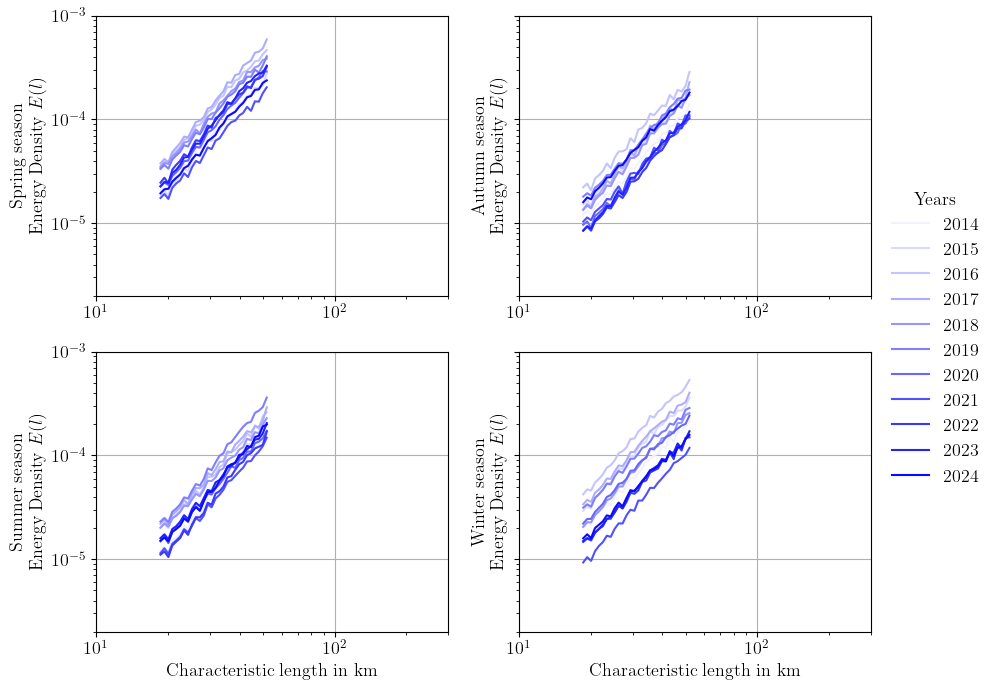

In [5]:

#Definition of the size of the grid
nx = np.min(dsr["uo"][0,0].where(maskloc, drop=True).shape)
ny = np.min(dsr["vo"][0,0].where(maskloc, drop=True).shape)

#Approximation of the cell size in meters
dx = 0.0833*93000 #0.0833*93000
dy = 0.0833*110000 #0.0833*110000

# Wavenumber axes
kx = np.fft.fftfreq(nx, d=dx)  
ky = np.fft.fftfreq(ny, d=dy) 

# Radial wavenumber grid
kx_grid, ky_grid = np.meshgrid(kx, ky, indexing='ij')
k_mag = np.sqrt(kx_grid**2 + ky_grid**2)

#Bins definition
valid_k = k_mag > 0
k_bins = np.logspace(np.log10(k_mag[valid_k].min()+0.1e-6)+1, np.log10(k_mag.max()), num=40)
k_centers = (k_bins[:-1] * k_bins[1:])**0.5


fig, axs = plt.subplots(2,2,sharex=False,sharey=True,figsize=(10,8))

#For each dataset
for i,dsr in enumerate(dsr_list):
    #for each season
    for j,mask in enumerate(seasons_masks):

        E_spectrum =  []
        
        print(str(j)+" "+str(mask[i].shape))
        # Select data
        u = np.array(dsr["uo"].where(mask[i], drop=True).where(maskloc, drop=True))
        v = np.array(dsr["vo"].where(mask[i], drop=True).where(maskloc, drop=True))
        
        # For each time step
        for t in range(u.shape[0]):    
            # Compute kinetic energy field
            E_l = 0.5 * (np.abs(u)**2 + np.abs(v)**2)/(nx*ny)

            # Kinetic energy in Fourier space
            E_k = np.abs(np.fft.fft2(E_l[t,0,:nx,:ny]))#

            # Bin the energies   
            E_spectrum.append(np.zeros_like(k_centers))
            N_modes = np.zeros_like(k_centers)
                    

            for k in range(len(k_bins)-1):
                mask_bin = (k_mag >= k_bins[k]) & (k_mag < k_bins[k+1])
                E_spectrum[t][k] = np.sum(E_k[mask_bin])
                N_modes[k] = np.sum(mask_bin)

            # Avoid division by zero (if a bin has no modes)
            valid_bins = N_modes > 0
            E_spectrum[t][valid_bins] /= N_modes[valid_bins]

            # Nyquist frequency mask
            nyq_mask = k_centers <= 1/(dy*2)


        # Plot
        reg = stats.linregress(np.log(1/(1000*k_centers[nyq_mask])), np.log(np.mean(E_spectrum,axis=0)[nyq_mask]))

        colors = [(0.4,0.8,0.98),(0.14,0.56,0.8),(0.06,0.38,0.55)]
        
        axs[j%2][j//2].plot(1/(1000*k_centers[nyq_mask]), np.mean(E_spectrum,axis=0)[nyq_mask], '-',label = str(years[i]) ,c = (0.95-i/(len(dsr_list)),0.95-i/(len(dsr_list)),1) )# (0.95-i/(len(dsr_list)),0.95-i/(len(dsr_list)),1)   +" (slope = "+str(round(reg.slope,2))+")"
        axs[j%2][j//2].set_xscale('log')
        axs[j%2][j//2].set_yscale('log')
        if j% 2 == 1 :
            axs[j%2][j//2].set_xlabel('Characteristic length in km')
        axs[j%2][j//2].set_xlim(10,300)
        axs[j%2][j//2].set_ylim(2e-6,1e-3)
        if j == 3 :
            axs[j%2][j//2].legend(loc=(1.04, 0.5), title="Years", frameon=False)
        
        
        dict_df = {"characteristic_length": 1/k_centers[nyq_mask],"0" : np.mean(E_spectrum,axis=0)[nyq_mask]}
        df = pd.DataFrame(dict_df)
        df.to_csv(r"C:\\Users\\albou\Desktop\\The_Ocean_Cleanup\\Work\\Github\\Simulation\\Submesoscale simulation\\Forcing\\comparison_spectrum\\EDS_"+str(years[i])+"_"+str(seasons_names[j])+"red.csv",index = False)

        axs[j%2][j//2].set_ylabel(str(seasons_names[j])+" season\n" +"Energy Density $E(l)$")
        axs[j%2][j//2].grid(visible= True)
# plt.savefig("EDS_GLORYS_years.pdf",bbox_inches = 'tight')


This method does compute the velocity fluctuation

IndexError: boolean index did not match indexed array along dimension 0; dimension is 61 but corresponding boolean dimension is 300

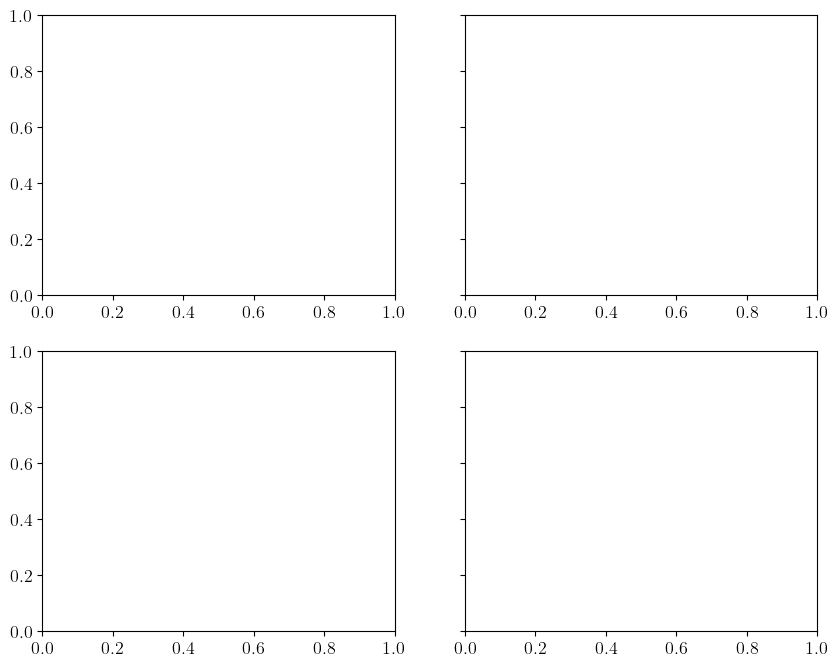

In [19]:
#Definition of the size of the grid
nx = np.min(dsr["uo"][0,0].shape)
ny = np.min(dsr["uo"][0,0].shape)

#Approximation of the cell size in meters
dx = 0.0833*93000
dy = 0.0833*110000

# Wavenumber axes
kx = np.fft.fftfreq(nx, d=dx)  
ky = np.fft.fftfreq(ny, d=dy) 

# Radial wavenumber grid
kx_grid, ky_grid = np.meshgrid(kx, ky, indexing='ij')
k_mag = np.sqrt(kx_grid**2 + ky_grid**2)

#Bins definition
valid_k = k_mag > 0
k_bins = np.logspace(np.log10(k_mag[valid_k].min()+0.1e-6)+1, np.log10(k_mag.max()), num=40)
k_centers = (k_bins[:-1] * k_bins[1:])**0.5


fig, axs = plt.subplots(2,2,sharex=False,sharey=True,figsize=(10,8))

#For each dataset
for i,dsr in enumerate(dsr_list):
    #for each season
    for j,mask in enumerate(seasons_masks):

        # Select data
        u = np.array(dsr["uo"].where(mask[i], drop=True).where(maskloc, drop=True))
        v = np.array(dsr["vo"].where(mask[i], drop=True).where(maskloc, drop=True))
        
        # Remove mean to get velocity fluctuations
        ui = u-np.mean(u,axis=0)
        vi = v-np.mean(v,axis=0)

        # Compute kinetic energy field
        E_l = 0.5 * (np.mean(np.power(ui,2),axis=0) + np.mean(np.power(vi,2),axis=0))/(nx*ny)

        # Kinetic energy in Fourier space
        E_k = np.abs(np.fft.fft2(E_l[0,:nx,:ny]))

        # Bin the energies   
        E_spectrum = np.zeros_like(k_centers)
        N_modes = np.zeros_like(k_centers)
                    

        for k in range(len(k_bins)-1):
            mask_bin = (k_mag >= k_bins[k]) & (k_mag < k_bins[k+1])
            E_spectrum[k] = np.sum(E_k[mask_bin])
            N_modes[k] = np.sum(mask_bin)

        # Avoid division by zero (if a bin has no modes)
        valid_bins = N_modes > 0
        E_spectrum[valid_bins] /= N_modes[valid_bins]

        # Nyquist frequency mask
        nyq_mask = k_centers <= 1/(dy*2)


        # Plot
        axs[j%2][j//2].plot(1/(1000*k_centers[nyq_mask]), E_spectrum[nyq_mask], '-',label = str(years[i]),c = colors[i])
        axs[j%2][j//2].set_xscale('log')
        axs[j%2][j//2].set_yscale('log')
        if j% 2 == 1 :
            axs[j%2][j//2].set_xlabel('Characteristic length in km')
        axs[j%2][j//2].set_xlim(10,250)
        if j == 2 :
            axs[j%2][j//2].legend()

        axs[j%2][j//2].set_ylabel(str(seasons_names[j])+" season\n" +"Energy Density $E(l)$")
        axs[j%2][j//2].grid(visible= True)


### Comparison of the EDS over the seasons for each year

This method does not compute the velocity fluctuation

0 (365,)
1 (365,)
2 (365,)
3 (365,)
0 (365,)
1 (365,)
2 (365,)
3 (365,)
0 (366,)
1 (366,)
2 (366,)
3 (366,)
0 (365,)
1 (365,)
2 (365,)
3 (365,)
0 (365,)
1 (365,)
2 (365,)
3 (365,)
0 (365,)
1 (365,)
2 (365,)
3 (365,)
0 (366,)
1 (366,)
2 (366,)
3 (366,)
0 (365,)
1 (365,)
2 (365,)
3 (365,)
0 (365,)
1 (365,)
2 (365,)
3 (365,)
0 (365,)
1 (365,)
2 (365,)
3 (365,)
0 (366,)
1 (366,)
2 (366,)
3 (366,)


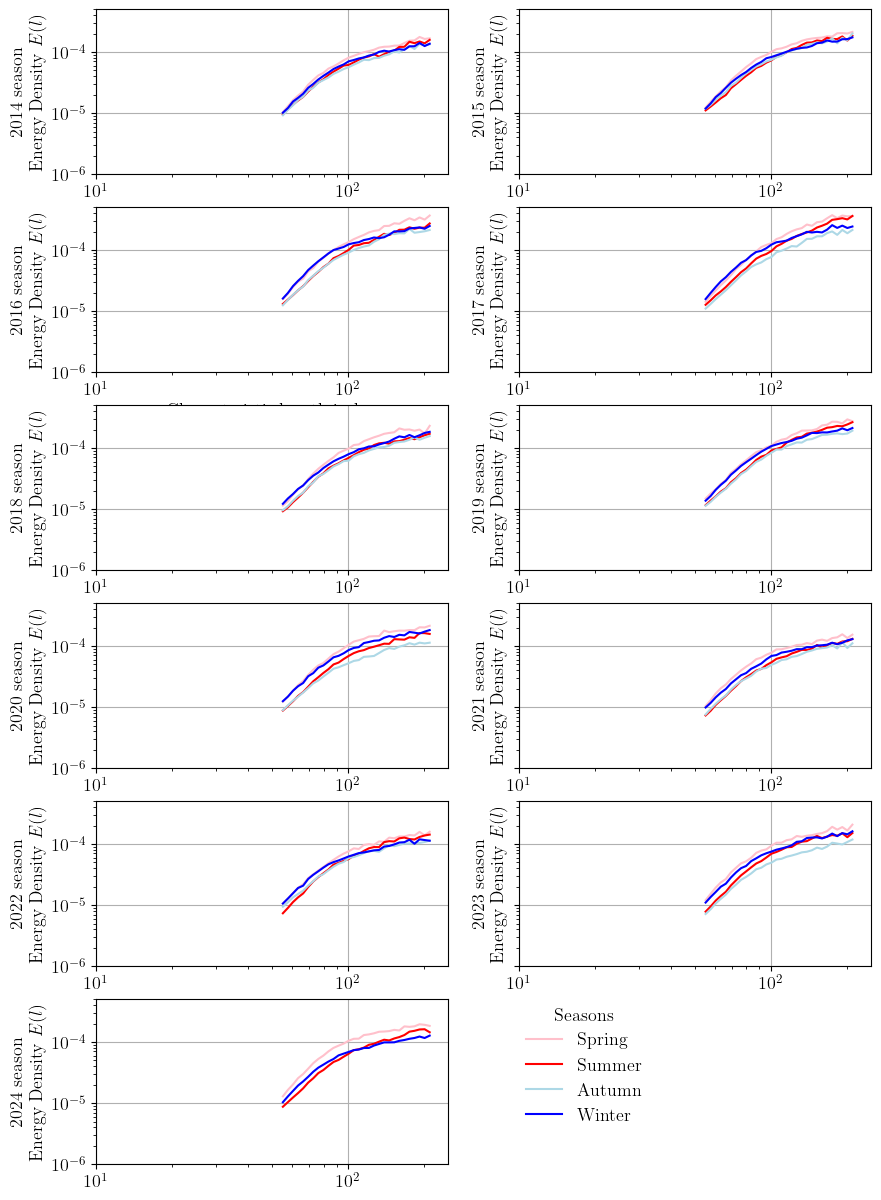

In [19]:
fig, axs = plt.subplots(6,2,sharex=False,sharey=True,figsize=(10,15))

colors = ['pink','red','lightblue','blue']

for i,dsr in enumerate(dsr_list):
    for j,mask in enumerate(seasons_masks):
        E_spectrum =  []

        print(str(j)+" "+str(mask[i].shape))
        
        u = np.array(dsr["ugos"].where(mask[i], drop=True).where(maskloc, drop=True))
        v = np.array(dsr["vgos"].where(mask[i], drop=True).where(maskloc, drop=True))

        for t in range(u.shape[0]):    
            # Compute kinetic energy field
            E_l = 0.5 * (np.abs(u)**2 + np.abs(v)**2)/(nx*ny)

            # Kinetic energy in Fourier space
            E_k = np.abs(np.fft.fft2(E_l[t,:nx,:ny]))

            # Bin the energies   
            E_spectrum.append(np.zeros_like(k_centers))
            N_modes = np.zeros_like(k_centers)
                    

            for k in range(len(k_bins)-1):
                mask_bin = (k_mag >= k_bins[k]) & (k_mag < k_bins[k+1])
                E_spectrum[t][k] = np.sum(E_k[mask_bin])
                N_modes[k] = np.sum(mask_bin)

            # Avoid division by zero (if a bin has no modes)
            valid_bins = N_modes > 0
            E_spectrum[t][valid_bins] /= N_modes[valid_bins]

        # Nyquist frequency mask
        nyq_mask = k_centers <= 1/(dy*2)


        # Plot
        
        axs[i//2][i%2].plot(1/(1000*k_centers[nyq_mask]), np.mean(E_spectrum,axis=0)[nyq_mask], '-',label = str(seasons_names[j]),color = colors[j])
        axs[i//2][i%2].set_xscale('log')
        axs[i//2][i%2].set_yscale('log')
        axs[i//2][i%2].set_xlim(right=None)
        if i == len(dsr_list)-1 :
            axs[i//2][i%2].legend(loc=(1.2, 0.2),frameon=False,title="Seasons")
        if i == 2 :
            axs[i//2][i%2].set_xlabel('Characteristic length in km')
        axs[i//2][i%2].set_xlim(10,250)
        axs[i//2][i%2].set_ylim(1e-6,5e-4)
        axs[i//2][i%2].set_ylabel(str(years[i])+" season\n" +"Energy Density $E(l)$")
        axs[i//2][i%2].grid(visible= True)
axs[-1][-1].axis('off')
plt.savefig("EDS_GLOBCURRENT_seasons.pdf",bbox_inches = 'tight') 


This method does compute the velocity fluctuation

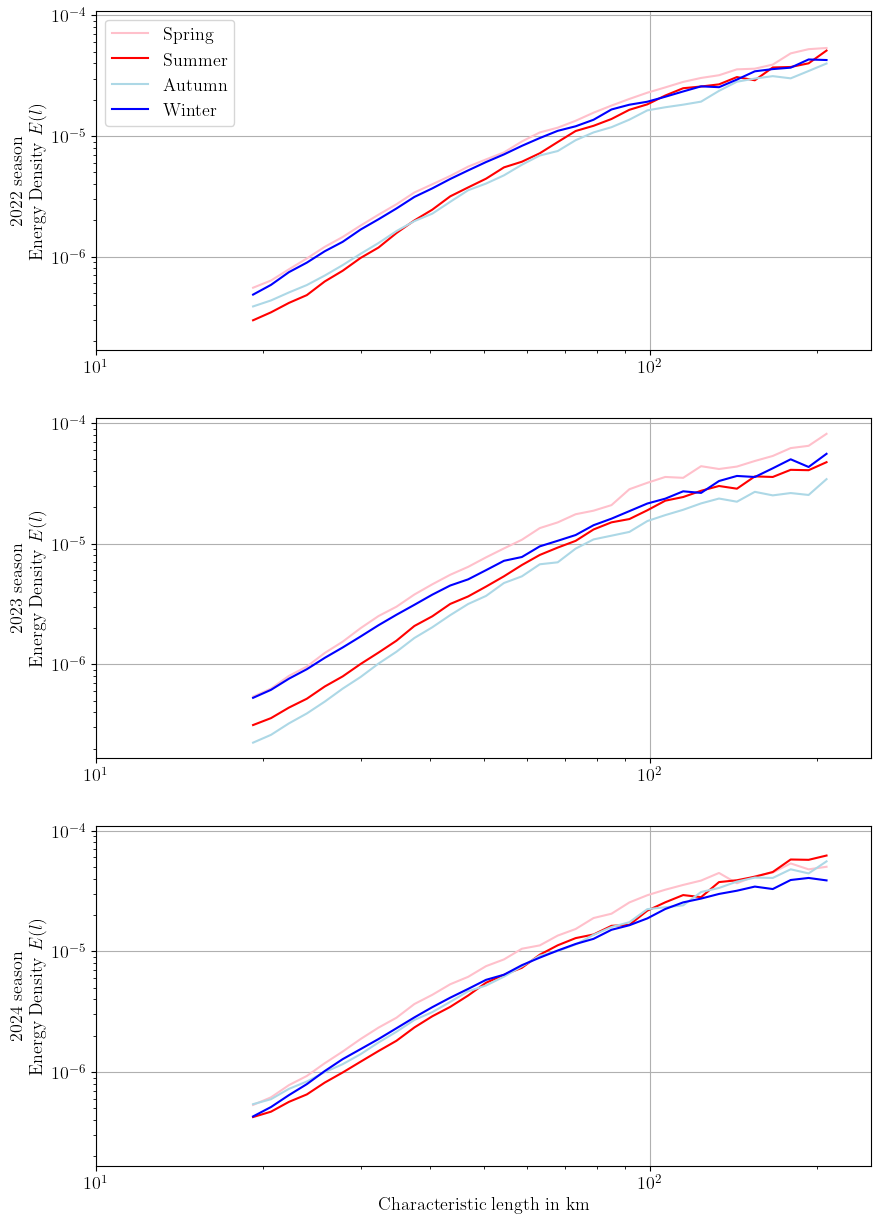

In [ ]:
#Definition of the size of the grid
nx = np.min(dsr["uo"][0,0].shape)
ny = np.min(dsr["uo"][0,0].shape)

#Approximation of the cell size in meters
dx = 0.0833*93000
dy = 0.0833*110000

# Wavenumber axes
kx = np.fft.fftfreq(nx, d=dx)  
ky = np.fft.fftfreq(ny, d=dy) 

# Radial wavenumber grid
kx_grid, ky_grid = np.meshgrid(kx, ky, indexing='ij')
k_mag = np.sqrt(kx_grid**2 + ky_grid**2)

#Bins definition
valid_k = k_mag > 0
k_bins = np.logspace(np.log10(k_mag[valid_k].min()+0.1e-6)+1, np.log10(k_mag.max()), num=40)
k_centers = (k_bins[:-1] * k_bins[1:])**0.5

colors = ['pink','red','lightblue','blue']

fig, axs = plt.subplots(len(dsr_list),sharex=False,sharey=True,figsize=(10,15))

#For each dataset
for i,dsr in enumerate(dsr_list):
    #for each season
    for j,mask in enumerate(seasons_masks):      
        # Select data
        u = np.array(dsr["uo"].where(mask[i], drop=True).where(maskloc, drop=True))
        v = np.array(dsr["vo"].where(mask[i], drop=True).where(maskloc, drop=True))

        # Remove mean to get velocity fluctuations
        ui = u-np.mean(u,axis=0)
        vi = v-np.mean(v,axis=0)

        # Compute kinetic energy field
        E_l = 0.5 * (np.mean(np.power(ui,2),axis=0) + np.mean(np.power(vi,2),axis=0))/(nx*ny)

        # Kinetic energy in Fourier space
        E_k = np.abs(np.fft.fft2(E_l[0,:nx,:ny]))

        # Bin the energies   
        E_spectrum = np.zeros_like(k_centers)
        N_modes = np.zeros_like(k_centers)
                    

        for k in range(len(k_bins)-1):
            mask_bin = (k_mag >= k_bins[k]) & (k_mag < k_bins[k+1])
            E_spectrum[k] = np.sum(E_k[mask_bin])
            N_modes[k] = np.sum(mask_bin)

        # Avoid division by zero (if a bin has no modes)
        valid_bins = N_modes > 0
        E_spectrum[valid_bins] /= N_modes[valid_bins]

        # Nyquist frequency mask
        nyq_mask = k_centers <= 1/(dy*2)


        # Plot
        axs[i].plot(1/(1000*k_centers[nyq_mask]), E_spectrum[nyq_mask], '-',label = str(seasons_names[j]),color = colors[j])
        axs[i].set_xscale('log')
        axs[i].set_yscale('log')
        axs[i].set_xlim(right=None)
        if i == 0 :
            axs[i].legend()
        if i == 2 :
            axs[i].set_xlabel('Characteristic length in km')
        axs[i].set_xlim(10,250)
        axs[i].set_ylabel(str(years[i])+" season\n" +"Energy Density $E(l)$")
        axs[i].grid(visible= True) 

In [ ]:
for dsr in dsr_list :
    dsr.close()